In [1]:
""" 
PROGRAM :  diagnostics_basics_cascade.ipynb 

reads in fgco2 assimilation runs, raw forecasts, 
historical runs and observational dataset 
to produce cascade plots

STATUS  : Complete
COMMENTS: (1) Check consistency between simulations and forecasts
           
"""

' \nPROGRAM :  diagnostics_basics_cascade.ipynb \n\nreads in fgco2 assimilation runs, raw forecasts, \nhistorical runs and observational dataset \nto produce cascade plots\n\nSTATUS  : Complete\nCOMMENTS: (1) Check consistency between simulations and forecasts\n           \n'

In [2]:
import warnings
warnings.filterwarnings('ignore')

from module_data_info import data_module
from module_data_locations import *
from module_data_load import load_data, load_ensemble
from module_data_preprocessing import * 
from module_global_averages import * 
from module_plot_cascades import *

In [3]:
unit_change = 60*60*24*365*1000/12* -1 # CMIP6 units --> units
units = r'mol m$^{-2}$ yr$^{-1}$' # ???

In [4]:
print(dir_forecasts)
print(dir_observations)
print(dir_assimilations)
print(dir_simulations)

/space/hall5/sitestore/eccc/crd/ccrn/users/rsa001/big_store/AI/FGCO2/data/forecasts
/space/hall5/sitestore/eccc/crd/ccrn/users/rsa001/big_store/AI/FGCO2/data/observations
/space/hall5/sitestore/eccc/crd/ccrn/users/rsa001/big_store/AI/FGCO2/data/assimilation
/space/hall5/sitestore/eccc/crd/ccrn/users/rsa001/big_store/AI/FGCO2/data/simulations


In [5]:
obs_info = data_module(dir_observations)
hnd_info = data_module(dir_forecasts)
asm_info = data_module(dir_assimilations)
sim_info = data_module(dir_simulations)
obs_info.PrintLoc()
hnd_info.PrintLoc()
asm_info.PrintLoc()
sim_info.PrintLoc()

/space/hall5/sitestore/eccc/crd/ccrn/users/rsa001/big_store/AI/FGCO2/data/observations
/space/hall5/sitestore/eccc/crd/ccrn/users/rsa001/big_store/AI/FGCO2/data/forecasts
/space/hall5/sitestore/eccc/crd/ccrn/users/rsa001/big_store/AI/FGCO2/data/assimilation
/space/hall5/sitestore/eccc/crd/ccrn/users/rsa001/big_store/AI/FGCO2/data/simulations


In [6]:
iname = 1 - 1
obs_names = ['SOMFFN']  # updated to 2021
obs_name = obs_names[iname]

obs_dict = obs_info.data_dict[obs_name]
asm_dict = asm_info.data_dict['asm']
sim_dict = sim_info.data_dict['sim']
hnd_dict = hnd_info.data_dict['hnd']

obs_dir  = obs_dict['dir']
obs_file = obs_dict['file']

asm_dir  = asm_dict['dir']
asm_file = asm_dict['file']

sim_dir  = sim_dict['dir']
sim_file = sim_dict['file']

hnd_dir  = hnd_dict['dir']
hnd_file = hnd_dict['file']

In [7]:
verbose = True
if verbose:
    print(obs_dir)
    print(hnd_dir)
    print(asm_dir)
    print(sim_dir)

/space/hall5/sitestore/eccc/crd/ccrn/users/rsa001/big_store/AI/FGCO2/data/observations
/space/hall5/sitestore/eccc/crd/ccrn/users/rsa001/big_store/AI/FGCO2/data/forecasts
/space/hall5/sitestore/eccc/crd/ccrn/users/rsa001/big_store/AI/FGCO2/data/assimilation
/space/hall5/sitestore/eccc/crd/ccrn/users/rsa001/big_store/AI/FGCO2/data/simulations


In [8]:
var = 'fgco2'
do_ems = True
if do_ems:
    varx     = f'{var}_ems'
    mdl_set  = 'canesm5-ems'
else:
    varx     = f'{var}'
    mdl_set  = 'canesm5'   

In [9]:
dir_out = f'{dir_output}/{varx}/{obs_name}/results/00_Diagnostics/Basics'

In [10]:
y0_obs = obs_dict['y0'] # ini year avaliable obs
y1_obs = obs_dict['y1'] # end year avaliable obs 

y0_raw = hnd_dict['y0'] # ini year avaliable predictions
y1_raw = hnd_dict['y1'] # end year avaliable predictions

y0_asm = asm_dict['y0'] # ini year avaliable assimilation runs
y1_asm = asm_dict['y1'] # end year avaliable assimilation runs

y0_sim = sim_dict['y0'] # ini year avaliable simulations
y1_sim = sim_dict['y1'] # ini year avaliable simulations

y0_show = max([y0_obs,   # ini year to show
               y0_raw])
y1_show = min([y1_obs,   # end year to show
               y1_raw])

y0_test = 1987     # ini year test sample (not used here, just to show region on plot)
y1_test = y1_show  # end year test sample (not used here, just to show region on plot)

In [11]:
verbose = True
if verbose:
    print("======")
    print(f"y0_obs : {y0_obs}")
    print(f"y1_obs : {y1_obs}")
    print("======")
    print(f"y0_raw : {y0_raw}")
    print(f"y1_raw : {y1_raw}")
    print("======")
    print(f"y0_asm : {y0_asm}")
    print(f"y1_asm : {y1_asm}")
    print("======")
    print(f"y0_sim : {y0_sim}")
    print(f"y1_sim : {y1_sim}")
    print("======")
    print(f"y0_show: {y0_show}")
    print(f"y1_show: {y1_show}")
    print("======")
    print(f"y0_test: {y0_test}")
    print(f"y1_test: {y1_test}")
    print("======")

y0_obs : 1982
y1_obs : 2021
y0_raw : 1981
y1_raw : 2023
y0_asm : 1958
y1_asm : 2021
y0_sim : 1980
y1_sim : 2030
y0_show: 1982
y1_show: 2021
y0_test: 1987
y1_test: 2021


In [12]:
hnd_in = load_ensemble(f'{hnd_dir}/{mdl_set}',
                        y0_raw,
                        varx,
                        y1_raw)*unit_change

loading forecasts..
done


In [13]:
obs_in = load_data(obs_dir)

loading data..
done


In [14]:
asm_in = load_data(f'{asm_dir}/{mdl_set}')*unit_change

loading data..
done


In [15]:
sim_in = load_data(f'{sim_dir}/{mdl_set}')*unit_change

loading data..
done


In [16]:
hnd_em = hnd_in.mean(dim='ensembles')

In [17]:
asm_em = rewrite_data_like_hindcasts(asm_in.mean(dim='ensembles'), 
                                     hnd_em)

In [18]:
sim_em = rewrite_data_like_hindcasts(sim_in.mean(dim='ensembles'), 
                                     hnd_em)

In [19]:
obs = rewrite_data_like_hindcasts(obs_in, 
                                  hnd_em)

In [20]:
idisplay = False
if idisplay:
    display(asm_in)
    display(hnd_in)
    display(sim_in)

In [21]:
idisplay = False
if idisplay:
    display(obs)
    display(hnd_em)
    display(asm_em)
    display(sim_em)

## Cascade ##

In [22]:
dict_data = {'obs'    : area_weighted_avg(obs,
                                          integral=True)[var].sel(year=slice(y0_show,
                                                                             y1_show)),
             'asm_em' : area_weighted_avg(asm_em,
                                           integral=True)[var].sel(year=slice(y0_show,
                                                                              y1_show)),
             'hnd_em'  : area_weighted_avg(hnd_em,
                                           integral=True)[var].sel(year=slice(y0_show,
                                                                              y1_show)),
             'sim_em' : area_weighted_avg(sim_em,
                                           integral=True)[var].sel(year=slice(y0_show,
                                                                              y1_show))
            }

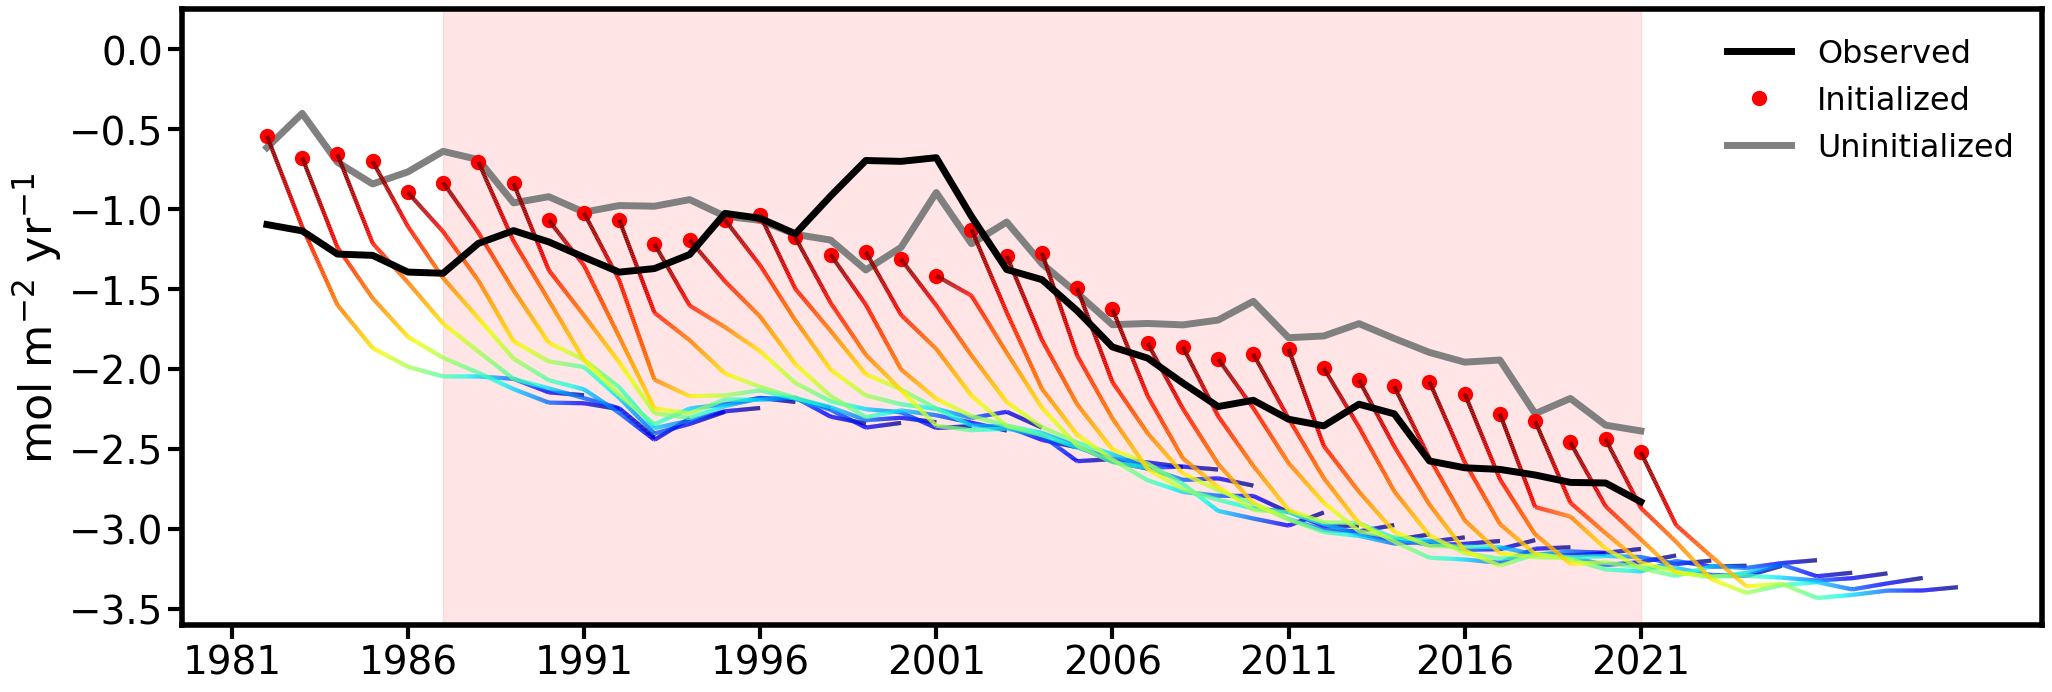

In [25]:
show_asm = True
choose_lead_max = False
nld_to_show = 10

nyrs = dict_data['hnd_em'].year.size
nyrs_test  = y1_test - y0_test + 1 
nyrs_train = nyrs - nyrs_test    

unit_converstion_for_plot = 12/1000/1e12

ds1 = dict_data['obs'].values*unit_converstion_for_plot
ds2 = dict_data['sim_em'].values*unit_converstion_for_plot
ds3 = dict_data['hnd_em'].values*unit_converstion_for_plot

if show_asm:
    ds2 = dict_data['asm_em'].values*unit_converstion_for_plot

(ts1,
 ts2,
 ts3) = get_time_series_to_plot_cascade(ds1,
                                        ds2,
                                        ds3)
if choose_lead_max:
    ts3 = ts3[:,0:nld_to_show]

ymin = -3.6 #np.min([np.min(ts1.flatten()[np.argwhere(np.isnan(ts1.flatten()) == False)]),
                   #    np.min(ts3.flatten()[np.argwhere(np.isnan(ts3.flatten()) == False)])]) - 0.5
ymax = 0. #np.max([np.max(ts1.flatten()[np.argwhere(np.isnan(ts1.flatten()) == False)]),
                   #    np.max(ts3.flatten()[np.argwhere(np.isnan(ts3.flatten()) == False)])]) + 0.5
    
file_out = f'Cascade_basics_{var}_{y0_show}-{y1_show}_nld-{nld_to_show}.png'
    
plot_cascade(ts1,
             ts2, #None
             ts3,
               title='',
               units=units,
               ymin=ymin,
               ymax=ymax+.25,
               xx_max=nyrs+4, 
               xx_i=y0_show-1,
               xx_step=5,
               shadesize_left=nyrs_train+1,
               shadesize_right=nyrs_test-1,
               show_samples=True,
               fig_dir=dir_out,
               fig_name=file_out,
               save=False)    